In [54]:
from Entities.database.Skill import get_skill_aggregate_hiscore
from Entities.helpers.SkillMod import DF_Levels, DF_Skill_Ratio

activity = 'Magic'
df, formatter = get_skill_aggregate_hiscore(activity)
df = DF_Skill_Ratio(df)
df.describe(include='bool')

,Banned
count,500
unique,2
top,False
freq,401


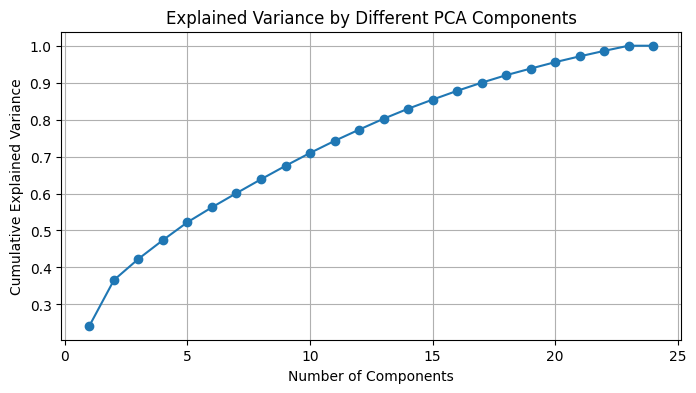

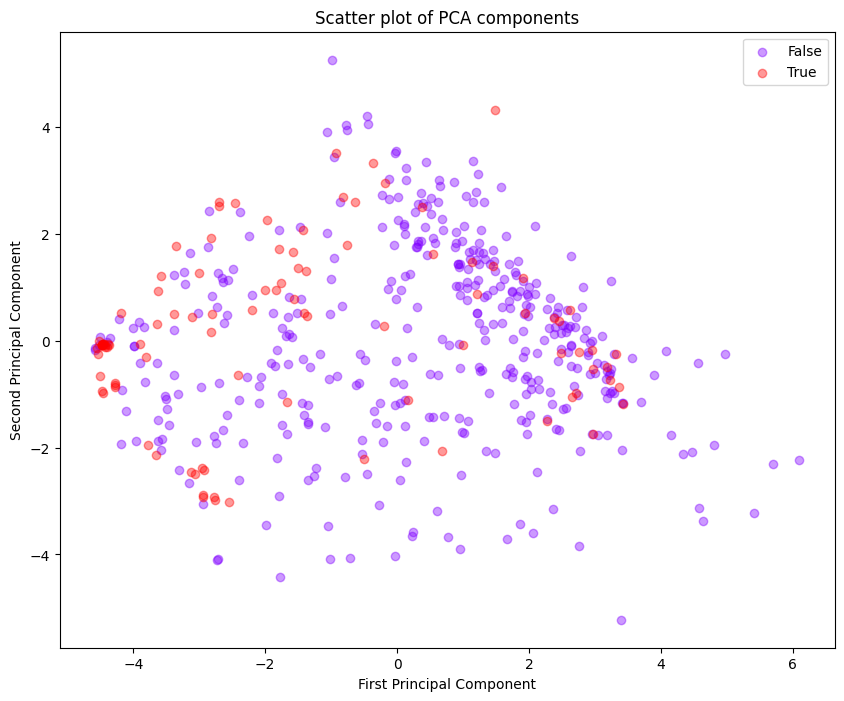

In [55]:
from Entities.features.Pca import Pca

pca = Pca(df=df, 
          skills=formatter.get_skill_names(), 
          #minigames = formatter.get_minigame_names(), 
          n_components=None)
pca.run()
pca.elbow_plot()
pca.plot()

In [56]:
from Entities.Models.RF import rf_model
from Entities.helpers.sampling import undersample

UNDERSAMPLE = False
THRESHOLD = 0.4

if UNDERSAMPLE:
    undersampled_df = undersample(df)
    class_weights = None
else:
    banned_count = len(df[df['Banned'] == True])
    unbanned_count = len(df[df['Banned'] == False])
    
    class_weights = {0: unbanned_count, 1: banned_count}


rf_model(pca.X_r, pca.y, class_weights, threshold=THRESHOLD)

Weights: {0: 401, 1: 99}
Accuracy: 0.86
Confusion Matrix:
 [[80  0]
 [14  6]]
Classification Report:
               precision    recall  f1-score   support

       False       0.85      1.00      0.92        80
        True       1.00      0.30      0.46        20

    accuracy                           0.86       100
   macro avg       0.93      0.65      0.69       100
weighted avg       0.88      0.86      0.83       100

ROC-AUC Score: 0.69
